In [20]:
import importlib
import sys
sys.path.append('../')  # Agrega la ruta al directorio utils

import utils.imports as imp
import utils.visuals as visu
import utils.processing as proc
import seaborn as sns
import matplotlib.pyplot as plt
importlib.reload(imp)
importlib.reload(visu)
importlib.reload(proc)


<module 'utils.processing' from 'c:\\Users\\52442\\OneDrive\\Documentos\\GitHub\\inegi_explore\\notebooks\\..\\utils\\processing.py'>

In [2]:
dataset = imp.pd.read_csv("../../cancer.csv")
dataset.drop(columns=['Unnamed: 32'], inplace=True)

In [3]:
dataset['diagnosis_num'] = imp.label_encoder.fit_transform(dataset['diagnosis'])
dataset = imp.pd.get_dummies(dataset, columns=['diagnosis'], drop_first=True)
dataset

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_num,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1,True
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1,True
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1,True
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1,True
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1,True
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1,True
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1,True
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1,True


In [4]:
correlaciones_a_calcular = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','diagnosis_num']
hue_column = 'diagnosis_num'
visu.save_histograms(dataset,hue_col=hue_column)
visu.save_specific_correlations_individual(dataset, correlaciones_a_calcular, hue_column)

c:\Ambientes\CD2024\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
c:\Ambientes\CD2024\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


In [5]:
proc.save_correlations(dataset)

Correlation data saved as 'output/correlations.csv'


In [6]:
norm_dataset = proc.normalize_cancer_data(dataset)

In [7]:
norm_dataset

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_num,diagnosis_M
0,-0.009902,0.045951,-0.086842,0.053192,0.041231,0.065696,0.137531,0.111116,0.106074,0.092881,...,0.096487,0.083822,0.054773,0.109600,0.088358,0.096172,0.115211,0.081132,1,0.054354
1,-0.009902,0.076643,-0.014812,0.070617,0.079947,-0.034638,-0.020401,-0.000999,0.022959,0.000058,...,0.064299,0.079184,-0.015733,-0.018029,-0.006147,0.045533,-0.010215,0.011778,1,0.054354
2,0.018084,0.066174,0.019108,0.065613,0.065294,0.039465,0.044102,0.057110,0.085330,0.039359,...,0.056439,0.060997,0.022091,0.045359,0.035811,0.081886,0.048263,0.008435,1,0.054354
3,0.018100,-0.032206,0.010628,-0.024825,-0.032020,0.137533,0.142532,0.080248,0.060805,0.120101,...,-0.010469,-0.023038,0.142170,0.163076,0.083335,0.091134,0.253240,0.206705,1,0.054354
4,0.018103,0.073312,-0.048244,0.074412,0.076492,0.011743,0.022590,0.057425,0.059833,-0.000400,...,0.056065,0.051130,0.009238,-0.013127,0.025683,0.030545,-0.036371,-0.016633,1,0.054354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-0.009874,0.088420,0.030219,0.086317,0.098173,0.043638,0.009175,0.081563,0.097214,-0.013093,...,0.073407,0.084412,0.015848,-0.011448,0.027833,0.068238,-0.056971,-0.029700,1,0.054354
565,-0.009874,0.071408,0.087337,0.067684,0.072204,0.004291,-0.000747,0.029028,0.052929,-0.009117,...,0.059558,0.062617,-0.028952,-0.016537,0.009909,0.030737,-0.022277,-0.040795,1,0.054354
566,-0.009874,0.029415,0.085680,0.028175,0.024208,-0.035204,-0.001620,0.001951,0.004431,-0.033890,...,0.024252,0.017923,-0.033910,0.014691,0.013687,0.017343,-0.046264,-0.013337,1,0.054354
567,-0.009873,0.077000,0.097863,0.083039,0.072680,0.063907,0.137055,0.138094,0.111367,0.089517,...,0.096487,0.069244,0.059914,0.163556,0.133933,0.095917,0.080381,0.092970,1,0.054354


In [8]:
training_data, test_data = proc.split_data(norm_dataset, 0.80)
training_input = training_data[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']]
training_output = training_data['diagnosis_num']
model = proc.simple_linear_regression(training_input, training_output, 30)

In [9]:
test_input = test_data[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']]
test_output = test_data['diagnosis_num']
test_predictions = proc.test_predictions(model, test_input, 30)

In [10]:
coefficients = proc.get_coefficients(model)
print("Coefficients: ", coefficients)
MSE = proc.get_mean_squared_error(test_output,
                                  test_predictions)
print("Mean Squared Error: ", MSE)
R2 = proc.get_coefficient_determination(test_output,
                                        test_predictions)
print("R² Score: ", R2)

Coefficients:  [-22.98122224   0.50909456  15.81686247   5.7040737    0.16970737
  -6.00947441   2.72842158   2.12803282   0.44085759   0.49143606
   3.22248746  -0.22775861  -0.43162525  -2.27237691   0.60992947
   0.45057373  -2.38015251   1.08389282   0.27525778  -0.48597636
  23.47427373   1.29654207  -3.35830631 -13.64316498   0.45917784
   0.96294691   1.03251166   1.50239977   0.43476318   1.08032908]
Mean Squared Error:  0.05463392536457536
R² Score:  0.7652042017070034


              precision    recall  f1-score   support

     benigno       0.88      1.00      0.94        72
     maligno       1.00      0.76      0.86        42

    accuracy                           0.91       114
   macro avg       0.94      0.88      0.90       114
weighted avg       0.92      0.91      0.91       114



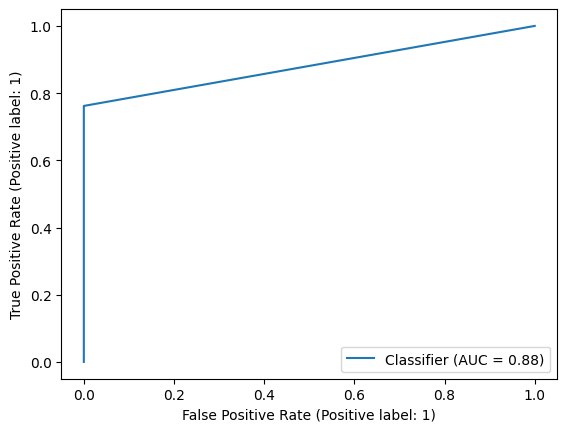

In [21]:
training_output = proc.values_2_categorical(training_output)
test_output = proc.values_2_categorical(test_output)

# crear y entrenar modelo
model = proc.logistic_regression(training_input, training_output)
# predicciones con conjunto test
test_predictions = model.predict(test_input)

names = ['benigno', 'maligno']

visu.save_confusion_matrix(test_output, test_predictions, names)
visu.save_roc_curve(test_output, test_predictions)